In [14]:
import numpy as np 
import pandas as pd
import matplotlib as plt
from tqdm import tqdm

In [15]:
total_data = pd.read_csv("./FinalDatasets/TotalDataset_Engineered.csv")

In [16]:
total_data.head(5)

,Unnamed: 0,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,...,S,F,class,attackType,year,month,days,hours,minutes,seconds
0,0,2017-03-15 00:01:16.632,0.000,TCP,192.168.100.5,445,192.168.220.16,58844.0,1,108,...,0,0,normal,none,2017,3,15,0,1,16.632
1,1,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,...,0,0,normal,none,2017,3,15,0,1,16.552
2,2,2017-03-15 00:01:16.551,0.004,TCP,192.168.220.15,48888,192.168.100.5,445.0,2,174,...,0,0,normal,none,2017,3,15,0,1,16.551
3,3,2017-03-15 00:01:16.631,0.004,TCP,192.168.220.16,58844,192.168.100.5,445.0,2,174,...,0,0,normal,none,2017,3,15,0,1,16.631
4,4,2017-03-15 00:01:17.432,0.000,TCP,192.168.220.9,37884,192.168.100.5,445.0,1,66,...,0,0,normal,none,2017,3,15,0,1,17.432


In [17]:
total_data.dtypes

Unnamed: 0           int64
Date first seen     object
Duration           float64
Proto               object
Src IP Addr         object
Src Pt               int64
Dst IP Addr         object
Dst Pt             float64
Packets              int64
Bytes                int64
U                    int64
A                    int64
P                    int64
R                    int64
S                    int64
F                    int64
class               object
attackType          object
year                 int64
month                int64
days                 int64
hours                int64
minutes              int64
seconds            float64
dtype: object

In [18]:
total_data['Dst Pt'] = total_data['Dst Pt'].astype('int64')
total_data['Proto'] = total_data['Proto'].astype('category')

In [19]:
proto_enc_df = pd.get_dummies(total_data['Proto'], dtype='int64')

proto_enc_df

,AH,ESP,GRE,ICMP,ICMP6,IGMP,IPIP,IPv6,OSPF,PIM,TCP,UDP,VRRP
0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39643004,0,0,0,0,0,0,0,0,0,0,0,1,0
39643005,0,0,0,0,0,0,0,0,0,0,0,1,0
39643006,0,0,0,0,0,0,0,0,0,0,0,1,0
39643007,0,0,0,0,0,0,0,0,0,0,0,1,0


Categorising the Proto column

In [20]:
total_data = total_data.join(proto_enc_df)

In [21]:
def label_anomaly(row):
    if row['class'] == 'normal':
        return 0
    
    else:
        return 1
    
total_data['Anomaly'] = total_data.apply(label_anomaly, axis=1)
#Binary feature that indicates if the row is victim/attacker or normal

Dst Pt
443     5053689
53      2447175
80      2439989
445      768750
3389     384337
         ...   
487           4
383           3
206           3
219           2
207           1
Name: count, Length: 65536, dtype: int64
Src Pt
443      6166378
80       3416163
53       2037309
53896    1085297
54235     933579
          ...   
614            1
198            1
719            1
780            1
567            1
Name: count, Length: 65535, dtype: int64


<Axes: xlabel='Src Pt'>

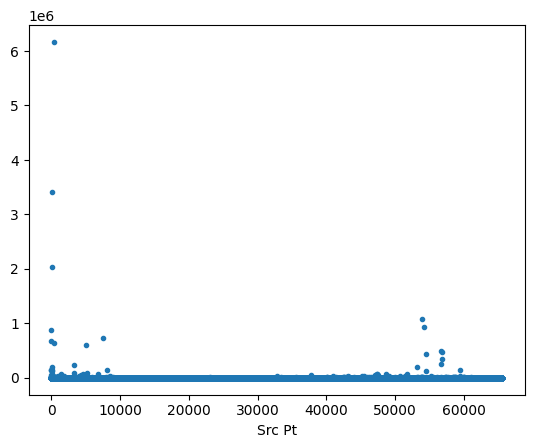

In [22]:
print(total_data["Dst Pt"].value_counts())
print(total_data["Src Pt"].value_counts())
total_data["Src Pt"].value_counts().plot(style='.')

We have an instance of each port value in Dst Pt, and for every port (other than 968) in Src Pt

In [23]:
list(set(total_data['Dst Pt'])-set(total_data['Src Pt']))

[968]

In [24]:
s_cols = ['Duration', 'Src Pt', 'Dst Pt', 'Packets', 'Bytes', 'year', 'month', 'days', 'hours', 'minutes', 'seconds']
#The list of columns to be standardised, we will create new columns for their respective zscores.
for col in s_cols:
    total_data[col + '_zscore'] = (total_data[col] - total_data[col].mean())/total_data[col].std(ddof=0)



In [25]:
total_data.head(5)

,Unnamed: 0,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,...,Src Pt_zscore,Dst Pt_zscore,Packets_zscore,Bytes_zscore,year_zscore,month_zscore,days_zscore,hours_zscore,minutes_zscore,seconds_zscore
0,0,2017-03-15 00:01:16.632,0.000,TCP,192.168.100.5,445,192.168.220.16,58844,1,108,...,-1.029953,1.598504,-0.031640,-0.018874,-2.489528,-0.293906,-0.266723,-1.585841,-2.431038,-0.711122
1,1,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888,1,108,...,-1.029953,1.170760,-0.031640,-0.018874,-2.489528,-0.293906,-0.266723,-1.585841,-2.431038,-0.715739
2,2,2017-03-15 00:01:16.551,0.004,TCP,192.168.220.15,48888,192.168.100.5,445,2,174,...,0.877048,-0.910521,-0.030993,-0.018848,-2.489528,-0.293906,-0.266723,-1.585841,-2.431038,-0.715797
3,3,2017-03-15 00:01:16.631,0.004,TCP,192.168.220.16,58844,192.168.100.5,445,2,174,...,1.268974,-0.910521,-0.030993,-0.018848,-2.489528,-0.293906,-0.266723,-1.585841,-2.431038,-0.711180
4,4,2017-03-15 00:01:17.432,0.000,TCP,192.168.220.9,37884,192.168.100.5,445,1,66,...,0.443866,-0.910521,-0.031640,-0.018890,-2.489528,-0.293906,-0.266723,-1.585841,-2.431038,-0.664954


In [30]:
features = list(total_data.columns)
features.remove("Unnamed: 0")
features.remove("Date first seen")
features.remove("class")
features.remove("attackType")

features.remove("Duration")
features.remove("Src Pt")
features.remove("Dst Pt")
features.remove("Packets")
features.remove("Bytes")
features.remove("year")
features.remove("month")
features.remove("days")
features.remove("hours")
features.remove("minutes")
features.remove("seconds")

# Not including IP addresses for now (Proto is now included as encoded features)
features.remove('Src IP Addr')
features.remove('Dst IP Addr')
features.remove('Proto')

# Anomaly is going to be our target variable
features.remove('Anomaly')

print(features)

['U', 'A', 'P', 'R', 'S', 'F', 'AH', 'ESP', 'GRE', 'ICMP', 'ICMP6', 'IGMP', 'IPIP', 'IPv6', 'OSPF', 'PIM', 'TCP', 'UDP', 'VRRP', 'Duration_zscore', 'Src Pt_zscore', 'Dst Pt_zscore', 'Packets_zscore', 'Bytes_zscore', 'year_zscore', 'month_zscore', 'days_zscore', 'hours_zscore', 'minutes_zscore', 'seconds_zscore']


In [27]:
target = 'Anomaly'

total_data[target].value_counts()

Anomaly
0    33703458
1     5939551
Name: count, dtype: int64

In [28]:
class Split():
    
    def __init__(self, num = 5):  # num refers to the number of datasets you wanna split the original total dataset into
        self.total_data = total_data
        self._0 = []
        self._1 = []
        self.cv = num

    def generate(self):
        self._split()

        res = []
        
        for i in tqdm(range(self.cv)):
            if i != self.cv-1:
                tmp = self._0[i*(len(self._0)//self.cv):(i+1)*(len(self._0)//self.cv)] + self._1[i*(len(self._1)//self.cv):(i+1)*(len(self._1)//self.cv)]
            elif i == self.cv-1:
                tmp = self._0[i*(len(self._0)//self.cv):-1] + self._1[i*(len(self._1)//self.cv):-1]
            res.append(tmp)

        return res # Returns arrays of indices
        
    def _split(self):
        length = len(self.total_data)
        print("Splitting...")
        for i in tqdm(range(length)):
            ttype = self.total_data.iloc[i].Anomaly
            match ttype:
                case 0:
                    self._0.append(i)
                case 1:
                    self._1.append(i)

        print("Splitting done!")


In [29]:
subset_count = 5
split = Split(num = subset_count) # num refers to the number of datasets you wanna split the original total dataset into
split_data = split.generate()

Splitting...


100%|████████████████████████████| 39643009/39643009 [40:41<00:00, 16237.76it/s]


Splitting done!


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  7.50it/s]


In [39]:
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import time

# Training various different models for reliability (different random_seed)
models = [KMeans(n_clusters = 2, random_state = 0, n_init='auto', verbose=1),
         KMeans(n_clusters = 2, random_state = 10, n_init='auto', verbose=1),
         KMeans(n_clusters = 2, random_state = 20, n_init='auto', verbose=1)]

# Batch Training out model
testing_subset_number = 4 # Which subset of the whole dataset you wish to test the models on. This index subset would be automatically removed from the training dataset
total_subset_arr = [i for i in range(subset_count)]
total_subset_arr.remove(testing_subset_number)

for subset in total_subset_arr: # Testing on the last subset
    print("Subset {}".format(subset+1))
    print("----------------------")
    
    # Obtaining our i-th subset of the total data
    X = total_data.iloc[split_data[subset]][features]
    y = total_data.iloc[split_data[subset]][target]
    
    # Applying StratifiedKFold to the specific subset
    skf = StratifiedKFold(n_splits=len(models))
    skf.get_n_splits(X, y)
    
    acc = []

    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        start_time = time.time()
        print(f"\nSubset - {subset+1} | Fold - {i+1}")
        print("----------------------")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Paste models here
        model = models[i]

        # Train
        if subset == 0:
            print("Training...")
            print("----------------------")
            model.fit(X_train)
        else:
            print("Training using saved model...")
            print("----------------------")
            model.fit(X_train) # Batch Training
            
        print("Training done!")
        print("----------------------")

        # Predict
        pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        acc.append(accuracy)
        # auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], multi_class='ovr')

        # Printing
        print("Subset - {} | Fold - {} Accuracy: {:.2f}%".format(subset+1, i+1, accuracy*100))
        # print("AUC: {:.2f}".format(auc))
        print("Time taken: {:.0f}s".format(time.time()-start_time))
        print("----------------------")

    print("----------------------")
    print("Average accuracy: {:.2f}%".format(np.mean(acc)*100))

Subset 1
----------------------

Subset - 1 | Fold - 1
----------------------
Training...
----------------------
Initialization complete
Iteration 0, inertia 66167093.420571946.
Iteration 1, inertia 36962871.527687594.
Iteration 2, inertia 31793527.099503595.
Iteration 3, inertia 31710059.044644043.
Converged at iteration 3: center shift 4.355113387465866e-06 within tolerance 2.8868961284232515e-05.
Training done!
----------------------
Subset - 1 | Fold - 1 Accuracy: 59.71%
Time taken: 3s
----------------------

Subset - 1 | Fold - 2
----------------------
Training...
----------------------
Initialization complete
Iteration 0, inertia 102679314.14067915.
Iteration 1, inertia 75641182.72414446.
Iteration 2, inertia 75232509.09644035.
Iteration 3, inertia 74639982.94457388.
Iteration 4, inertia 73805471.79828681.
Iteration 5, inertia 73688618.20107406.
Converged at iteration 5: center shift 3.7093992606815336e-06 within tolerance 5.3013813961683925e-05.
Training done!
------------------

In [40]:
total_acc = []

X_new = total_data.iloc[split_data[testing_subset_number]][features]
y_new = total_data.iloc[split_data[testing_subset_number]][target]
acc = []
    
for model in models:
    pred_new = model.predict(X_new)
    accuracy_new = accuracy_score(y_new, pred_new)
    acc.append(accuracy_new)

total_acc.append(np.mean(acc))

print("Total accuracy over the other subsets of the total data: {:.2f}%".format(np.mean(total_acc)*100))

Total accuracy over the other subsets of the total data: 51.65%


The accuracy above is my attempt at using Kim's StratifiedKFold with some KMeans models, though I suspect I'm not using it correctly?

The following code below is fitting the kmeans model using only 1 kmeans model and without StratifiedKFold cross-validation

In [43]:
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto', verbose=1)

for subset in total_subset_arr:
    kmeans.fit(total_data.iloc[split_data[subset]][features])



Initialization complete
Iteration 0, inertia 140990833.09997106.
Iteration 1, inertia 95061087.83322358.
Iteration 2, inertia 84967628.75311369.
Iteration 3, inertia 84476047.76070605.
Converged at iteration 3: center shift 3.8394090392904e-06 within tolerance 4.5389141415780936e-05.
Initialization complete
Iteration 0, inertia 77769855.5129528.
Iteration 1, inertia 42866067.40214734.
Iteration 2, inertia 42203771.807709135.
Iteration 3, inertia 42186907.90649967.
Iteration 4, inertia 42185403.10976848.
Iteration 5, inertia 42184768.928964294.
Iteration 6, inertia 42184159.32686338.
Iteration 7, inertia 42183969.45781922.
Converged at iteration 7: center shift 4.837007904783836e-06 within tolerance 2.2974714142073856e-05.
Initialization complete
Iteration 0, inertia 68072077.62517685.
Iteration 1, inertia 44847356.27156328.
Iteration 2, inertia 44814069.35913756.
Iteration 3, inertia 44813528.73758955.
Converged at iteration 3: center shift 3.6050670726236226e-08 within tolerance 3.064

In [44]:
X_new = total_data.iloc[split_data[testing_subset_number]][features]
y_new = total_data.iloc[split_data[testing_subset_number]][target]

pred = model.predict(X_new)
accuracy = accuracy_score(y_new, pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 63.54%
